# 国土交通省の不動産価格情報を使った簡単なデータ分析
## 参考ページ

- [ハンズオンで学ぶPythonを用いた簡単な統計学](https://data.nifcloud.com/blog/study_python-statistics/)


## データのダウンロード
https://www.land.mlit.go.jp/webland/download.html から2021年第1四半期の東京都文京区の不動産の取引価格情報をダウンロード  
ダウンロードした13105_20211_20211.csvファイルをノートブックファイルと同じ階層に配置

## 文字化け対策  

In [ ]:
pip install japanize_matplotlib

In [4]:
import japanize_matplotlib

## データ解析用ライブラリPandasのインストール

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


## pandasを使って取引価格データをロードしてデータの先頭5行を表示する

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 100)
df = pd.read_csv('13105_20211_20211.csv', encoding='CP932')
df.head(5)

,No,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,坪単価,間取り,面積（㎡）,取引価格（㎡単価）,土地の形状,間口,延床面積（㎡）,建築年,建物の構造,用途,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等
0,1,中古マンション等,NaN,13105,東京都,文京区,大塚,護国寺,3,24000000,NaN,１Ｋ,20,NaN,NaN,NaN,NaN,平成12年,ＲＣ,住宅,住宅,NaN,NaN,NaN,商業地域,80,400,2021年第１四半期,改装済,NaN
1,2,中古マンション等,NaN,13105,東京都,文京区,大塚,護国寺,4,15000000,NaN,１Ｋ,20,NaN,NaN,NaN,NaN,平成10年,ＳＲＣ,住宅,住宅,NaN,NaN,NaN,商業地域,80,500,2021年第１四半期,未改装,NaN
2,3,中古マンション等,NaN,13105,東京都,文京区,大塚,護国寺,4,70000000,NaN,NaN,65,NaN,NaN,NaN,NaN,平成20年,ＲＣ,住宅,住宅,NaN,NaN,NaN,商業地域,80,400,2021年第１四半期,未改装,NaN
3,4,宅地(土地と建物),住宅地,13105,東京都,文京区,大塚,新大塚,3,66000000,NaN,NaN,55,NaN,ほぼ長方形,4.7,95.0,令和2年,木造,住宅,住宅,北,私道,3.3,準工業地域,60,300,2021年第１四半期,NaN,NaN
4,5,宅地(土地),商業地,13105,東京都,文京区,大塚,新大塚,4,70000000,3700000.0,NaN,65,1100000.0,ほぼ長方形,5.0,NaN,NaN,NaN,NaN,住宅,西,区道,10.6,準工業地域,60,300,2021年第１四半期,NaN,NaN


## データの特徴を要約して表す要約統計量を表示する

In [4]:
df.describe()

,No,市区町村コード,最寄駅：距離（分）,取引価格（総額）,坪単価,面積（㎡）,取引価格（㎡単価）,間口,延床面積（㎡）,前面道路：幅員（ｍ）,建ぺい率（％）,容積率（％）
count,187.000000,187.0,187.000000,1.870000e+02,2.200000e+01,187.000000,2.200000e+01,45.00000,23.000000,45.000000,187.000000,187.000000
mean,94.000000,13105.0,5.181818,7.366738e+07,3.450000e+06,59.946524,1.034545e+06,7.84000,206.521739,6.142222,73.368984,432.085561
std,54.126395,0.0,2.768698,1.209229e+08,7.189609e+05,71.991616,2.150466e+05,5.18119,305.578567,5.192017,9.440686,145.681318
min,1.000000,13105.0,0.000000,9.300000e+06,2.200000e+06,15.000000,6.600000e+05,1.00000,50.000000,2.300000,60.000000,150.000000
25%,47.500000,13105.0,3.000000,2.300000e+07,3.050000e+06,20.000000,9.125000e+05,4.70000,72.500000,3.900000,60.000000,300.000000
50%,94.000000,13105.0,5.000000,5.000000e+07,3.450000e+06,50.000000,1.000000e+06,6.70000,95.000000,4.000000,80.000000,400.000000
75%,140.500000,13105.0,7.000000,7.650000e+07,3.850000e+06,70.000000,1.175000e+06,9.40000,150.000000,5.600000,80.000000,600.000000
max,187.000000,13105.0,12.000000,9.600000e+08,4.700000e+06,790.000000,1.400000e+06,27.60000,1400.000000,22.200000,80.000000,600.000000


## 種類を「中古マンション等」に絞って要約統計量を表示する

In [5]:
df = df[df["種類"] == "中古マンション等"]
df.describe()

,No,市区町村コード,最寄駅：距離（分）,取引価格（総額）,坪単価,面積（㎡）,取引価格（㎡単価）,間口,延床面積（㎡）,前面道路：幅員（ｍ）,建ぺい率（％）,容積率（％）
count,140.000000,140.0,140.000000,1.400000e+02,0.0,140.000000,0.0,0.0,0.0,0.0,140.000000,140.000000
mean,94.621429,13105.0,5.035714,4.644857e+07,NaN,41.892857,NaN,NaN,NaN,NaN,75.857143,475.714286
std,55.544715,0.0,2.946552,3.232712e+07,NaN,25.050078,NaN,NaN,NaN,NaN,8.134279,123.859649
min,1.000000,13105.0,0.000000,9.300000e+06,NaN,15.000000,NaN,NaN,NaN,NaN,60.000000,150.000000
25%,45.250000,13105.0,3.000000,2.200000e+07,NaN,20.000000,NaN,NaN,NaN,NaN,80.000000,400.000000
50%,92.500000,13105.0,4.500000,3.500000e+07,NaN,35.000000,NaN,NaN,NaN,NaN,80.000000,500.000000
75%,142.250000,13105.0,7.000000,6.900000e+07,NaN,55.000000,NaN,NaN,NaN,NaN,80.000000,600.000000
max,187.000000,13105.0,12.000000,2.100000e+08,NaN,135.000000,NaN,NaN,NaN,NaN,80.000000,600.000000


## 面積のヒストグラムを作成する

### データ可視化ライブラリseabornをインストールする

In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:xlabel='面積（㎡）', ylabel='Count'>

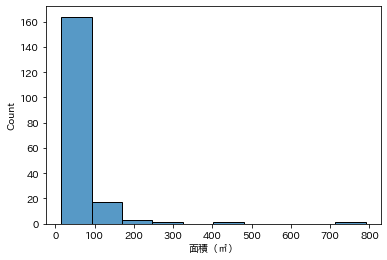

In [5]:
import seaborn as sns
%matplotlib inline
sns.histplot(df["面積（㎡）"] , bins=10)

## 面積と取引価格の散布図を表示する

<AxesSubplot:xlabel='面積（㎡）', ylabel='取引価格（総額）'>

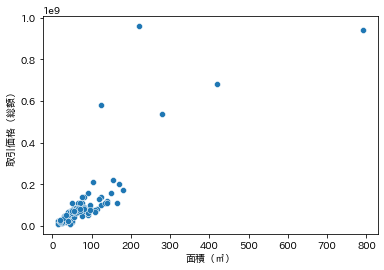

In [6]:
sns.scatterplot(data=df, x='面積（㎡）', y='取引価格（総額）')